In [1]:
import numpy as np
import pandas as pd
import random
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse,
    plot_cog_regression_history
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer_rework import EM


true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.01123988 0.01207819 0.01155182 0.02688619 0.
 0.01019029 0.         0.         0.        ]
a = 1.8531667261047913, b = 1.5312904682995265


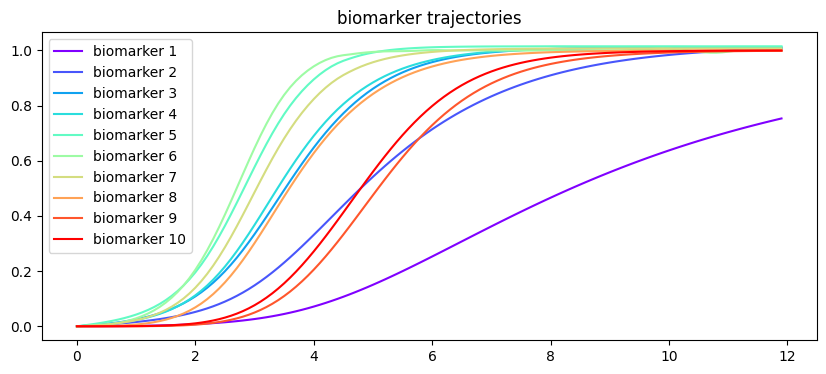

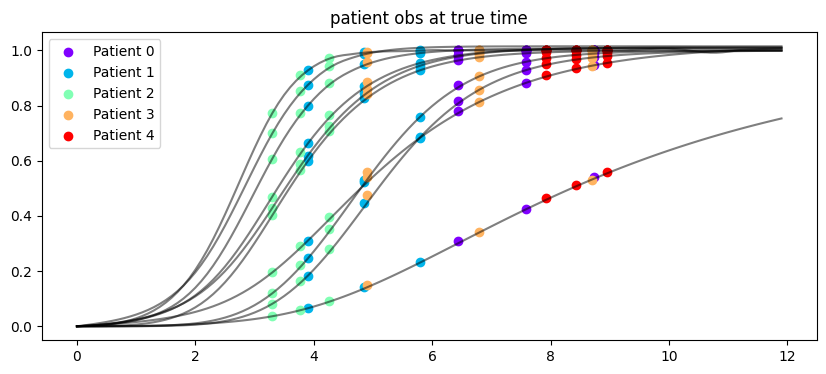

initial conditions:
n_patients: 200, n_obs: 600
initial f: [0.04265834 0.03062581 0.13285009 0.13686635 0.18663288 0.150298
 0.18537247 0.18945669 0.1733556  0.0025204 ]
initial s: [1.29863068 2.48683136 0.16573133 0.5031427  2.95964328 2.98186855
 2.48212827 2.54551839 1.26382145 2.03467892]
initial scalar K: 2.5136350483846033
initial beta: (200,)
(10, 1200)
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) (1, 600)
cog params: (3, 1) (1,) 1
600 (600, 10) (600,) 

  0%|          | 0/20 [00:00<?, ?it/s]

AttributeError: 'EM' object has no attribute 'beta_iter_'

In [2]:
# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K, x0, f, scalar_K  = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t,
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

biomarker_cols = [col for col in df.columns if col.startswith("biomarker_")]

X = df[biomarker_cols].values
dt = df["dt"].values
ids = df["patient_id"].values
cog = df["cognitive_score"].values

# print(df[biomarker_cols].shape)
# print(df["dt"].shape)
# print(df["patient_id"].shape)
# print(df["cognitive_score"].shape)

em_model_0 = EM(num_iterations=20, t_max=t_max, step=0.01, use_jacobian=True, lambda_cog=0.0)
em_model_0.fit(X=X, dt=dt, ids=ids, cog=cog, K=K)

f_true = f 
s_true = np.ones(n_biomarkers)
scalar_K_true = 1.0 

#plot_initial_beta_guess(df, em_model_0.beta_iter_, t, x_true)
# final parameters
theta_final = em_model_0.theta_iter_[f"iter_{em_model_0.num_iterations - 1}"].values
x0_final = theta_final[:n_biomarkers]
f_final = theta_final[n_biomarkers:2*n_biomarkers]
x_final = solve_system(x0_final, f_final, K, t_span)

# initial parameters
theta_init = em_model_0.theta_iter_["iter_0"].values
x0_init = theta_init[:n_biomarkers]
f_init = theta_init[n_biomarkers:2*n_biomarkers]
x_init = solve_system(x0_init, f_init, K, t_span)

# plotting
plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(
    theta_iter=em_model_0.theta_iter_,
    n_biomarkers=n_biomarkers,
    num_iterations=em_model_0.num_iterations,
    f_true=f,
    s_true=np.ones(n_biomarkers),
    scalar_K_true=scalar_K
)
plot_beta_overlay(df, em_model_0.beta_iter_, em_model_0.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model_0.num_iterations - 1)
plot_beta_error_history(em_model_0.beta_iter_, df, em_model_0.num_iterations)
plot_lse(em_model_0.lse_array_)
plot_cog_regression_history(em_model_0.cog_regression_history_)

